In [103]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [104]:
# Importing all required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Step 1: Reading and Understanding the Data

In [105]:
df = pd.read_csv("auto-mpg-1.csv")

In [106]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [107]:
df = df.drop(['torque'], axis = 1) 

In [108]:
print("*********************************  Info *******************************************") 
print(df.info())
print("*********************************  Shape ******************************************") 
print(df.shape)
print("**************************** Columns having null values *****************************")
print(df.isnull().any())
print("**************************** Describe *****************************")
df.describe()

*********************************  Info *******************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 762.1+ KB
None
*********************************  Shape ******************************************
(8128, 12)
**************************** 

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [109]:
df.select_dtypes(include='object').isnull().sum()[df.select_dtypes(include='object').isnull().sum()>0]

mileage      221
engine       221
max_power    215
dtype: int64

In [110]:
df = df.dropna()

In [111]:
df.select_dtypes(include='object').isnull().sum()[df.select_dtypes(include='object').isnull().sum()>0]

Series([], dtype: int64)

No more null values

In [112]:
df['mileage'] = df['mileage'].str.replace('kmpl', '')
df['mileage'] = df['mileage'].str.replace('km/kg', '')
df['engine'] = df['engine'].str.replace('CC', '')
df['max_power'] = df['max_power'].str.replace('bhp', '')

In [113]:
#deleting rows that had a unit but no numeric values and converting all values to type float
df['mileage'] = pd.to_numeric(df['mileage'],errors = 'coerce')
df['engine'] = pd.to_numeric(df['engine'],errors = 'coerce')
df['max_power'] = pd.to_numeric(df['max_power'],errors = 'coerce')

In [114]:
df = df.dropna()

In [115]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248,73.90,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396,70.00,5.0


In [116]:
X = df.drop(columns=['selling_price'])
y = df['selling_price']

#### Plotting the relationships between the label (Selling Price) and the discrete features (fuel type, Seller type, transmission) using a small multiple of box plots

In [117]:
disc_features = ['fuel', 'seller_type', 'transmission', 'owner']
df1 = X[disc_features]
target = y

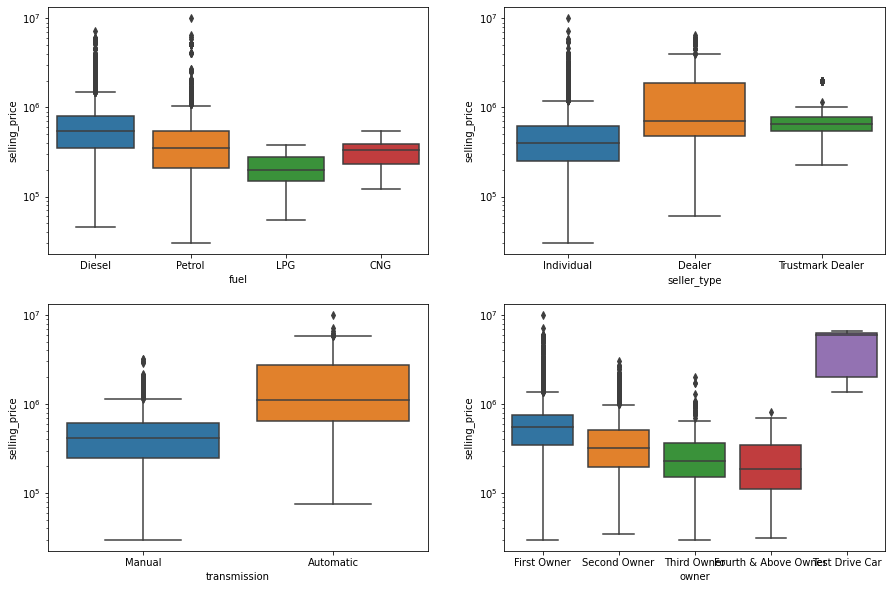

In [118]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
for var, subplot in zip(disc_features, ax.flatten()):
    plot = sns.boxplot(x=var, y=target, data = df1, ax=subplot)
    plot.set_yscale("log")

From the plots for the continuous variable, we observe a linear relationship as stated earlier. Additionally, the discrete features also can potentially be modeled in a linear fashion. Hence, linear regressions seem to be a suitable model for the given problem.

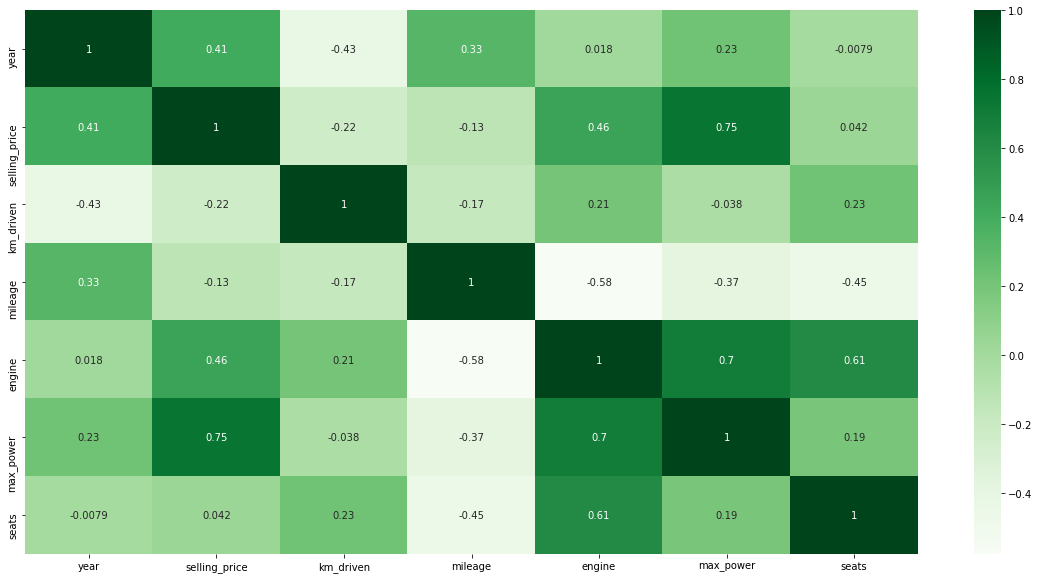

In [119]:
# Check the correlation of numerical columns

plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True, cmap="Greens")
plt.show()

In [120]:
X

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0
2,Honda City 2017-2020 EXi,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0
4,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5.0
8125,Maruti Swift Dzire ZDi,2009,120000,Diesel,Individual,Manual,First Owner,19.30,1248,73.90,5.0
8126,Tata Indigo CR4,2013,25000,Diesel,Individual,Manual,First Owner,23.57,1396,70.00,5.0


In [121]:
X['year'] =  2020 - X['year']


In [122]:
#dropping the car name as it is irrelevant.
X.drop(["name"],axis = 1,inplace=True)

#check out the dataset with new changes
X.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,6,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0
1,6,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0
2,14,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0
3,10,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0
4,13,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0


In [123]:
fuel_ohc = pd.get_dummies(X['fuel'])
seller_type_ohc = pd.get_dummies(X['seller_type'])
transmission_ohc = pd.get_dummies(X['transmission'])
owner_ohc = pd.get_dummies(X['owner'])

X = pd.concat([X, fuel_ohc,seller_type_ohc,transmission_ohc,owner_ohc], axis=1)
X = X.drop(columns=['seller_type','fuel','owner','transmission'])

In [124]:
#dataframe after one hot encoding for categorical variables
X.head()

,year,km_driven,mileage,engine,max_power,seats,CNG,Diesel,LPG,Petrol,Dealer,Individual,Trustmark Dealer,Automatic,Manual,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,6,145500,23.40,1248,74.00,5.0,0,1,0,0,0,1,0,0,1,1,0,0,0,0
1,6,120000,21.14,1498,103.52,5.0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
2,14,140000,17.70,1497,78.00,5.0,0,0,0,1,0,1,0,0,1,0,0,0,0,1
3,10,127000,23.00,1396,90.00,5.0,0,1,0,0,0,1,0,0,1,1,0,0,0,0
4,13,120000,16.10,1298,88.20,5.0,0,0,0,1,0,1,0,0,1,1,0,0,0,0


In [125]:
y

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8123    320000
8124    135000
8125    382000
8126    290000
8127    290000
Name: selling_price, Length: 7906, dtype: int64

# Train-test-split

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 10)            
rfe = rfe.fit(X_train, y_train)

In [128]:
col = X_train.columns[rfe.support_]

# assign the 10 features selected using RFE to a dataframe and view them

temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

,Variable,rfe_support,rfe_ranking
0,Dealer,True,1
1,Individual,True,1
2,Trustmark Dealer,True,1
3,Automatic,True,1
4,Manual,True,1
5,First Owner,True,1
6,Fourth & Above Owner,True,1
7,Second Owner,True,1
8,Test Drive Car,True,1
9,Third Owner,True,1


In [129]:
# Assign the 10 columns to X_train_rfe

X_train_rfe = X_train[col]

In [130]:
# Associate the new 10 columns to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

# Model Building and Evaluation

In [131]:
# list pf alphas

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [132]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
25,500,-351943.427660,-352149.911672,1
24,100,-351944.111765,-352223.388635,2
5,0.3,-352519.917714,-352942.440142,3
4,0.2,-352477.818126,-352943.355404,4
3,0.1,-352433.127534,-352952.400830,5
2,0.01,-352401.019199,-352961.852665,6
1,0.001,-352397.879777,-352962.874129,7
0,0.0001,-352397.564952,-352962.977083,8
6,0.4,-352559.656170,-352978.732596,9
7,0.5,-352597.257289,-353013.466791,10


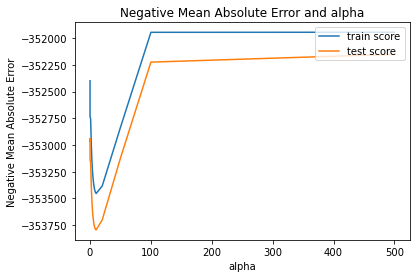

In [133]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [134]:
# get the best estimator for lambda

ridge_model_cv.best_estimator_

Ridge(alpha=500)

In [135]:
# check the coefficient values with lambda = 10

alpha = 500
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 238767.39832227, -175765.31695917,  -63002.0813631 ,
        449820.57748154, -449820.57748154,  138455.66268397,
        -40899.26938719,  -58164.510249  ,   27902.33582309,
        -67294.21887086])

In [136]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,Dealer,238767.3983
1,Individual,-175765.3170
2,Trustmark Dealer,-63002.0814
3,Automatic,449820.5775
4,Manual,-449820.5775
5,First Owner,138455.6627
6,Fourth & Above Owner,-40899.2694
7,Second Owner,-58164.5102
8,Test Drive Car,27902.3358
9,Third Owner,-67294.2189


In [137]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'Dealer': 238767.3983,
 'Individual': -175765.317,
 'Trustmark Dealer': -63002.0814,
 'Automatic': 449820.5775,
 'Manual': -449820.5775,
 'First Owner': 138455.6627,
 'Fourth & Above Owner': -40899.2694,
 'Second Owner': -58164.5102,
 'Test Drive Car': 27902.3358,
 'Third Owner': -67294.2189}

In [138]:
# Do an RFE to minimise the features to 8
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, 8)            
rfe = rfe.fit(X_train_ridge, y_train)

In [139]:
# Method to get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

,Features,rfe_support,rfe_ranking,Coefficient
1,Automatic,True,1,449820.5775
3,First Owner,True,1,138455.6627
6,Test Drive Car,True,1,27902.3358
4,Fourth & Above Owner,True,1,-40899.2694
5,Second Owner,True,1,-58164.5102
0,Trustmark Dealer,True,1,-63002.0814
7,Third Owner,True,1,-67294.2189
2,Manual,True,1,-449820.5775


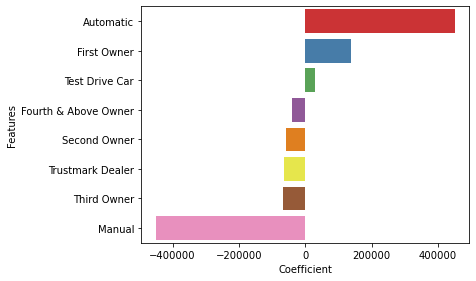

In [140]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp1_df)
plt.show()

# Lasso

In [141]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [142]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
10,0.01,-352397.533197,-352962.985755,1
9,0.005,-352397.531579,-352962.987143,2
8,0.004,-352397.531256,-352962.987420,3
7,0.003,-352397.530932,-352962.987698,4
6,0.002,-352397.530609,-352962.987976,5
5,0.001,-352397.530285,-352962.988253,6
4,0.0005,-352397.530123,-352962.988392,7
3,0.0004,-352397.530091,-352962.988420,8
2,0.0003,-352397.530059,-352962.988448,9
1,0.0002,-352397.530026,-352962.988475,10


In [143]:
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')


In [144]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.01)

In [145]:

alpha = 0.01

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 468827.51521879,   29696.28429588, -119603.5397049 ,
       1203787.83059786,      -0.        ,  217243.44913252,
       -112922.03676589,   15582.03475208, 3371031.66951676,
        -52946.59414298])

In [146]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,Dealer,4.688275e+05
1,Individual,2.969628e+04
2,Trustmark Dealer,-1.196035e+05
3,Automatic,1.203788e+06
4,First Owner,2.172434e+05
5,Fourth & Above Owner,-1.129220e+05
6,Second Owner,1.558203e+04
7,Test Drive Car,3.371032e+06
8,Third Owner,-5.294659e+04


In [147]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'Dealer': 468827.51521878934,
 'Individual': 29696.284295879646,
 'Trustmark Dealer': -119603.53970490451,
 'Automatic': 1203787.8305978617,
 'Manual': -0.0,
 'First Owner': 217243.44913252094,
 'Fourth & Above Owner': -112922.03676589063,
 'Second Owner': 15582.034752076945,
 'Test Drive Car': 3371031.6695167557,
 'Third Owner': -52946.594142984024}

In [148]:
# Do an RFE to minimise the features to 8

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, 8)            
rfe = rfe.fit(X_train_lasso, y_train)

In [149]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 8 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
6,Test Drive Car,True,1,3.371032e+06
0,Dealer,True,1,4.688275e+05
3,First Owner,True,1,2.172434e+05
1,Individual,True,1,2.969628e+04
5,Second Owner,True,1,1.558203e+04
7,Third Owner,True,1,-5.294659e+04
4,Fourth & Above Owner,True,1,-1.129220e+05
2,Trustmark Dealer,True,1,-1.196035e+05


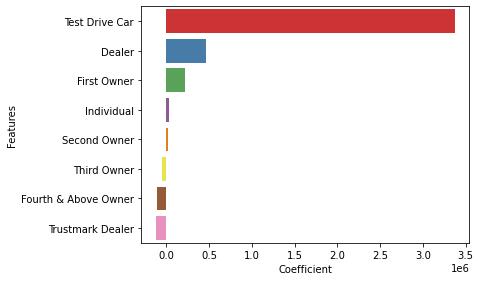

In [150]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_df)
plt.show()

In [151]:
# Check the mean squared error
mean_squared_error(y_test, ridge.predict(X_test))

417808486827.479

In [152]:
# Check the mean squared error
mean_squared_error(y_test, lasso.predict(X_test))

403341306275.08484

## Conclusion :

- The optimal lambda value in case of Ridge and Lasso is as below:
    - Ridge - 10
    - Lasso - 0.01
- The mean squared error for the dataset is really high. Hence, `linear regression` may not a model to apply on this dataset.
- The mean squared error of Lasso is slightly lower than that of Ridge
- Therefore, the variables predicted by Lasso in the above bar chart are significant variables for predicting the  price of the car
